In [ ]:
from tensorflow.keras.applications import EfficientNetV2L

model = EfficientNetV2L(weights='imagenet',
                        include_top=False,
                        input_shape=(224, 224, 3))

model.summary()

473186304/473176280 [==============================] - 3s 0us/step
Model: "efficientnetv2-l"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling (Rescaling)          (None, 224, 224, 3)  0           ['input_1[0][0]']                
                                                                                                  
 stem_conv (Conv2D)             (None, 112, 112, 32  864         ['rescaling[0][0]']              
                                )                                                                 
                

In [ ]:
for layer in model.layers:
  layer.trainable = False

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *

my_model = Sequential([model,
                       GlobalAveragePooling2D(),
                       Dense(512, activation='relu'),
                       Dropout(0.2),
                       Dense(512, activation='relu'),
                       Dropout(0.2),
                       Dense(1, activation='sigmoid')])

my_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetv2-l (Functiona  (None, 7, 7, 1280)       117746848 
 l)                                                              
                                                                 
 global_average_pooling2d (G  (None, 1280)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 512)               655872    
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 dropout_1 (Dropout)         (None, 512)               0

In [ ]:
import os

try:
  os.makedirs('images')
except FileExistsError:
  pass

try:
  os.makedirs(os.path.join('images', 'cats'))
except FileExistsError:
  pass

try:
  os.makedirs(os.path.join('images', 'dogs'))
except FileExistsError:
  pass

In [ ]:
import shutil

for filename in os.listdir('train'):
  full_path = os.path.join('train', filename)

  if filename.split('.')[0] == 'cat':
    shutil.copy(full_path, os.path.join('images', 'cats', filename))
  else:
    shutil.copy(full_path, os.path.join('images', 'dogs', filename))

In [ ]:
# import shutil
# shutil.rmtree(os.path.join('images', '.ipynb_checkpoints'))

In [ ]:
import tensorflow as tf

BATCH_SIZE = 4
SEED = 1

train_dataset = tf.keras.utils.image_dataset_from_directory(
    'images',
    color_mode='rgb',
    batch_size=BATCH_SIZE,
    image_size=(224, 224),
    shuffle=True,
    validation_split=0.2,
    subset='training',
    seed=SEED)

val_dataset = tf.keras.utils.image_dataset_from_directory(
    'images',
    color_mode='rgb',
    batch_size=BATCH_SIZE,
    image_size=(224, 224),
    shuffle=False,
    validation_split=0.2,
    subset='validation',
    seed=SEED
)

Found 25000 files belonging to 2 classes.
Using 20000 files for training.
Found 25000 files belonging to 2 classes.
Using 5000 files for validation.


In [ ]:
iterator = iter(train_dataset)

In [ ]:
next(iterator)[0][0].numpy().shape

(224, 224, 3)

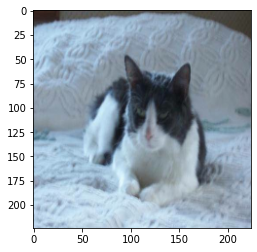

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

plt.imshow(next(iterator)[0][0].numpy().astype(np.int32))

In [ ]:
from tensorflow.image import flip_left_right, adjust_brightness, adjust_contrast

def augment(image, label):
  image = flip_left_right(image)
  image = adjust_brightness(image, delta=0.1)
  image = adjust_contrast(image, contrast_factor=1.75)

  return (image, label)

train_dataset = train_dataset.map(augment, num_parallel_calls=tf.data.AUTOTUNE)

iterator = iter(train_dataset)

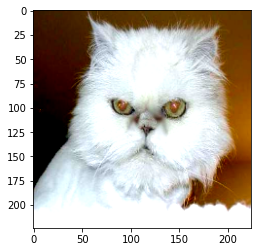

In [ ]:
plt.imshow(next(iterator)[0][0].numpy().astype(np.int32))

In [ ]:
train_dataset = train_dataset.prefetch(tf.data.AUTOTUNE)
train_dataset

<PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [ ]:
val_dataset = val_dataset.prefetch(tf.data.AUTOTUNE)

val_dataset

<PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [ ]:
from tensorflow.keras.metrics import *

metrics = ['accuracy', Precision(), Recall(), AUC()]

from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy

my_model.compile(loss=BinaryCrossentropy(),
                 optimizer=Adam(learning_rate=0.001),
                 metrics=metrics)

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

es = EarlyStopping(patience=3, monitor='val_loss')

In [ ]:
my_model.fit(train_dataset, epochs=1000,
             validation_data=val_dataset,
             callbacks=[es])

In [ ]:
 # To save your trained model:

 # my_model.save('model')

In [ ]:
# To downlaod your saved model, zip with code below then download

# !zip -r model.zip model

In [ ]:
# To unzip a zipped model folder:

# !unzip model.zip

In [ ]:
# To load a model back in memory from an unzipped model folder:

# model_1 = tf.keras.models.load_model('model')

# model_1

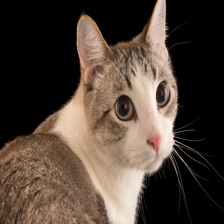

In [ ]:
from PIL import Image

image = Image.open('cat.a_random_cat_I_added.jpg')
image = image.resize((224, 224))
image

In [ ]:
img = np.asarray(image)

img.shape

(224, 224, 3)

In [ ]:
from copy import deepcopy

img_2 = deepcopy(img)

images = [img, img_2]

In [ ]:
prediction = my_model.predict(np.array(images))

prediction

array([[4.0267992e-07],
       [4.0267992e-07]], dtype=float32)

In [ ]:
sorted(['cats', 'dogs'])

['cats', 'dogs']